# Unity Assignement #
_**Data Analysis**_

---
## Contents

1. [Prepare](#Prepare)
3. [Analysis](#Analysis)
  1. [How many sessions are in the dataset?](#How_many_sessions_are_in_the_dataset?)
  2. [How many sessions are completed per country?](#How_many_sessions_are_completed_per_country?)
  3. [How many sessions are completed per player?](#How_many_sessions_are_completed_per_player?)
  4. [What is the country with more sessions started during 2018?](#What_is_the_country_with_more_sessions_started_during_2018?)
  5. [Plot the player sessions completed per country](#Plot_the_player_sessions_completed_per_country)

# Prepare

In [1]:
# Import findspark 
import findspark

# Or use this alternative
findspark.init()

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Unity Data Analysis") \
   .config("spark.executor.memory", "2gb") \
   .getOrCreate()

In [3]:
sessiondf = spark.read.json("C:/Users/MHu/Desktop/MyUnityAssignment/Data/assignment_data.jsonl")

In [4]:
# Print the data types of all `df` columns
# sessiondf.dtypes

# Print the schema of `df`
sessiondf.printSchema()

root
 |-- country: string (nullable = true)
 |-- event: string (nullable = true)
 |-- player_id: string (nullable = true)
 |-- session_id: string (nullable = true)
 |-- ts: string (nullable = true)



In [5]:
from pyspark.sql.functions import to_timestamp
sessiondf = sessiondf.withColumn("ts", to_timestamp("ts"))

In [6]:
sessiondf.printSchema()

root
 |-- country: string (nullable = true)
 |-- event: string (nullable = true)
 |-- player_id: string (nullable = true)
 |-- session_id: string (nullable = true)
 |-- ts: timestamp (nullable = true)



In [7]:
sessiondf.createOrReplaceTempView("session")

# Analysis

### How_many_sessions_are_in_the_dataset?

In [8]:
q1 = spark.sql("SELECT COUNT(DISTINCT SESSION_ID) SessionsCount \
from session")
q1.take(1)

[Row(SessionsCount=500587)]

### How_many_sessions_are_completed_per_country?

In [9]:
# Only display top 20
q2 = spark.sql("Select country, count(session_ID) SessionsCount \
from session \
where event = 'start' and session_id in ( \
    select session_id \
    from session \
    where event = 'end') \
GROUP BY COUNTRY \
ORDER BY count(session_ID) desc")
q2.show()

+-------+-------------+
|country|SessionsCount|
+-------+-------------+
|     IT|         2839|
|     SH|         2672|
|     AZ|         2670|
|     AT|         2655|
|     WF|         2616|
|     VA|         2602|
|     HU|         2584|
|     IL|         2563|
|     RO|         2550|
|     KR|         2535|
|     SR|         2533|
|     TO|         2521|
|     MD|         2516|
|     LS|         2475|
|     NO|         2461|
|     DE|         2440|
|     TF|         2433|
|     EG|         2431|
|     CD|         2423|
|     GS|         2414|
+-------+-------------+
only showing top 20 rows



### How_many_sessions_are_completed_per_player?

In [10]:
# Only display top 20
q3 = spark.sql("Select player_id, count(session_ID) SessionsCount \
from session \
where event = 'end' \
GROUP BY player_id \
ORDER BY count(session_ID) desc")
q3.show()

+--------------------+-------------+
|           player_id|SessionsCount|
+--------------------+-------------+
|bc21a941806e41ad9...|           50|
|ada4c853861d4957b...|           50|
|9d3241418f3841659...|           50|
|e53d1cb155a548b3b...|           50|
|26255c2697e64a919...|           50|
|8500e7ecc46c414e9...|           50|
|24bd8188b2d241e88...|           50|
|dcb42f3696004708a...|           50|
|a7c5a28df8e84b5a9...|           50|
|d758509e77e049769...|           50|
|bbeaff310c1b4c878...|           50|
|5534f125269940e29...|           50|
|8982e790fad04f18a...|           50|
|908af531441641dc9...|           50|
|b0c7f160b7834a25a...|           50|
|a3db69f0aa004df5b...|           50|
|fd9a7f6f335745fdb...|           50|
|37370d0139544d1ca...|           50|
|821ea0f158a04c8ab...|           50|
|e8f36a8efded42bfb...|           50|
+--------------------+-------------+
only showing top 20 rows



### What_is_the_country_with_more_sessions_started_during_2018?

In [11]:
# this dataset doesn't include 2018 data, so I used 2016 in criteria
q4 = spark.sql("select country \
from session \
where year(ts) = 2016 and event = 'start' \
group by country \
order by count(session_ID) desc \
Limit 1")
q4.show()

+-------+
|country|
+-------+
|     IT|
+-------+



### Plot_the_player_sessions_completed_per_country

In [12]:
q5 = spark.sql("Select country, count(session_ID) SessionsCount \
from session \
where event = 'start' and session_id in ( \
    select session_id \
    from session \
    where event = 'end') \
GROUP BY COUNTRY \
ORDER BY count(session_ID) desc")
pdq5 = q5.toPandas()

In [13]:
# Too many countries in a chart, so take it down to top 20 by sessions count
pdq5_head = pdq5.head(20)

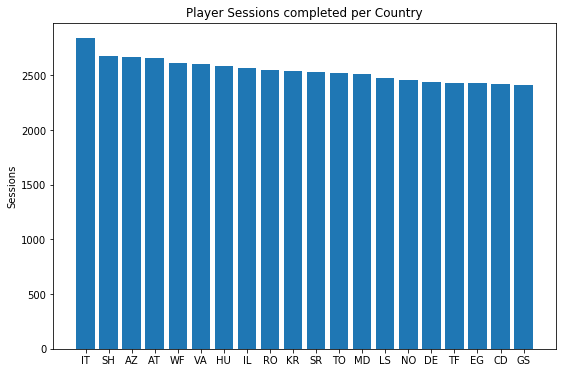

In [15]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))

plt.bar(pdq5_head['country'], pdq5_head['SessionsCount'], align='center', alpha=1)

plt.ylabel('Sessions')
plt.title('Player Sessions completed per Country')

plt.show()